In [15]:
# Piotr Rogula, 249801

""" installation of packages. No version specified (can be skipped)"""
!pip install -r ..\requirements.txt

In [1]:
from forest import Forest, GifTool, WindyForest
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import Image, display
from multiprocessing import Pool
from functools import partial
from sklearn.linear_model import LinearRegression

In [3]:
""" forest class is implemented in forest.py file. """
# gif example
f = Forest(10, 0.5, gif_tool=GifTool())
f.play()
f.gif_tool.save_gif('example.gif', duration=1)

In [3]:
display(Image(url='data/gif/example.gif'))

# Task 3

In [17]:
wind_power = 0.1
f = WindyForest(10, 0.5, gif_tool=GifTool(), wind_power=wind_power)
f.play()
f.gif_tool.save_gif('wind_02.gif', duration=1)
display(Image(url='data/gif/wind_02.gif'))

In [6]:
wind_power = 0.5
f = WindyForest(10, 0.5, gif_tool=GifTool(), wind_power=wind_power)
f.play()
f.gif_tool.save_gif('wind_05.gif', duration=1)
display(Image(url='data/gif/wind_05.gif'))

# task 1

In [8]:
""" Functions counting p* with monte carlo included and creating plots"""
def percolation(p: float, size: int, mc_steps: int):
    """ Function counting percolation of the lattice for <mc_steps> monte carlo steps, being given parameters p, size
    Args:
        p:
        size:
        mc_steps:
    Returns:

    """
    forest = Forest(size=size, p=p)
    perc_list = []
    for _ in range(mc_steps):
        forest.__init__(size, p)
        forest.play()
        perc_list.append(forest.fire_hit_edge())
    return np.mean(perc_list)


def plot_percolation(size: int, mc_steps: int, p_step: float = 0.02, p_min: float = 0, p_max: float = 1, show: bool = True):
    # percolation p*(p)
    p_list = np.arange(p_min,p_max+p_step,p_step)

    perc = {prb: 1 for prb in p_list}
    for prb in tqdm(p_list):
        percolation_p = percolation(prb, size, mc_steps)
        if percolation_p == 1:
            break
        perc[prb] = percolation_p

    plt.figure(figsize=(10,5))
    plt.scatter(perc.keys(), perc.values())
    plt.title(f'percolation of p, for {mc_steps} monte carlo steps, lattice {size}x{size}')
    plt.xlabel('p')
    plt.ylabel('p*')
    plt.grid()
    if show:
        plt.show()

    return perc

 53%|███████████████████████████████████████████▍                                      | 27/51 [00:18<00:16,  1.48it/s]


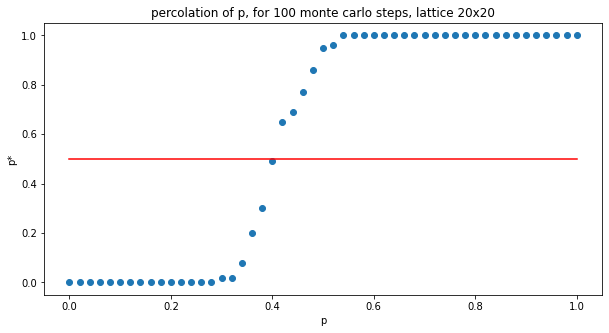

In [12]:
"""percolation p*(p), Lattice 20 X 20 """
size = 20
mc_steps=100
p_step = 0.02
plot_percolation(size=size, mc_steps=mc_steps, show = False)
plt.plot([0,1], [0.5, 0.5], 'r-')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [04:42<00:00,  6.89s/it]


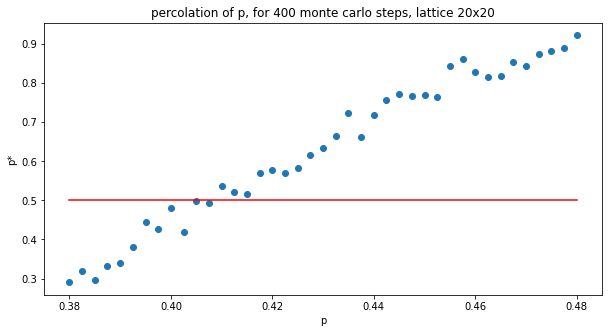

{0.38: 0.29, 0.3825: 0.32, 0.385: 0.295, 0.3875: 0.3325, 0.39: 0.34, 0.3925: 0.38, 0.395: 0.445, 0.3975: 0.4275, 0.4: 0.48, 0.4025: 0.42, 0.405: 0.4975, 0.40750000000000003: 0.4925, 0.41000000000000003: 0.5375, 0.41250000000000003: 0.5225, 0.41500000000000004: 0.5175, 0.41750000000000004: 0.57, 0.42000000000000004: 0.5775, 0.42250000000000004: 0.57, 0.42500000000000004: 0.5825, 0.42750000000000005: 0.6175, 0.43000000000000005: 0.635, 0.43250000000000005: 0.665, 0.43500000000000005: 0.7225, 0.43750000000000006: 0.6625, 0.44000000000000006: 0.7175, 0.44250000000000006: 0.7575, 0.44500000000000006: 0.7725, 0.44750000000000006: 0.7675, 0.45000000000000007: 0.77, 0.45250000000000007: 0.765, 0.45500000000000007: 0.845, 0.4575000000000001: 0.8625, 0.4600000000000001: 0.8275, 0.4625000000000001: 0.815, 0.4650000000000001: 0.8175, 0.4675000000000001: 0.855, 0.4700000000000001: 0.845, 0.4725000000000001: 0.875, 0.4750000000000001: 0.8825, 0.4775000000000001: 0.89, 0.4800000000000001: 0.9225}


In [18]:
# we take closer look.
size = 20
mc_steps = 400
p_step = 0.0025
p_min, p_max = 0.38, 0.48
perc = plot_percolation(size=size, mc_steps=mc_steps, p_step=p_step, p_min=p_min, p_max=p_max, show = False)
plt.plot([p_min, p_max], [0.5, 0.5], 'r-')
plt.show()
print(perc)

In [22]:
vals = {0.38: 0.29, 0.3825: 0.32, 0.385: 0.295, 0.3875: 0.3325, 0.39: 0.34, 0.3925: 0.38, 0.395: 0.445, 0.3975: 0.4275, 0.4: 0.48, 0.4025: 0.42, 0.405: 0.4975, 0.40750000000000003: 0.4925, 0.41000000000000003: 0.5375, 0.41250000000000003: 0.5225, 0.41500000000000004: 0.5175, 0.41750000000000004: 0.57, 0.42000000000000004: 0.5775, 0.42250000000000004: 0.57, 0.42500000000000004: 0.5825, 0.42750000000000005: 0.6175, 0.43000000000000005: 0.635, 0.43250000000000005: 0.665, 0.43500000000000005: 0.7225, 0.43750000000000006: 0.6625, 0.44000000000000006: 0.7175, 0.44250000000000006: 0.7575, 0.44500000000000006: 0.7725, 0.44750000000000006: 0.7675, 0.45000000000000007: 0.77, 0.45250000000000007: 0.765, 0.45500000000000007: 0.845, 0.4575000000000001: 0.8625, 0.4600000000000001: 0.8275, 0.4625000000000001: 0.815, 0.4650000000000001: 0.8175, 0.4675000000000001: 0.855, 0.4700000000000001: 0.845, 0.4725000000000001: 0.875, 0.4750000000000001: 0.8825, 0.4775000000000001: 0.89, 0.4800000000000001: 0.9225}
X = np.array([it for it in vals.keys()]).reshape(-1,1)
Y = np.array([it for it in vals.values()])

model = LinearRegression()
model.fit(X,Y)
print('estimator: ' + str((0.5 - model.intercept_)/model.coef_[0]))


estimator: 0.4092577620108352


 49%|████████████████████████████████████████▏                                         | 25/51 [11:17<11:44, 27.09s/it]


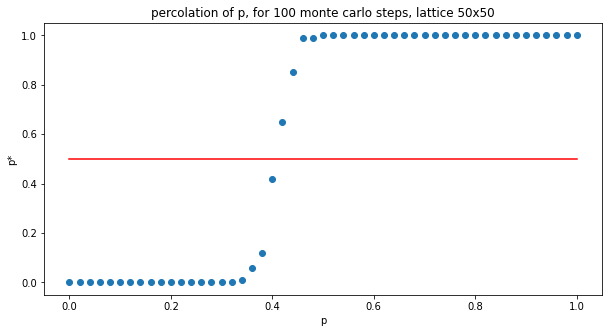

In [19]:
"""percolation p*(p), Lattice 50 X 50 """
size = 50
mc_steps=100
p_step = 0.02
plot_percolation(size=size, mc_steps=mc_steps, show = False)
plt.plot([0,1], [0.5, 0.5], 'r-')
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [1:13:30<00:00, 210.05s/it]


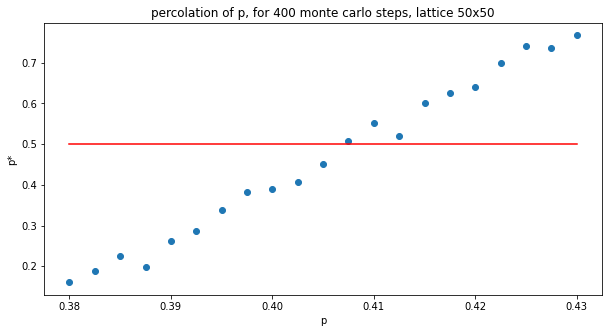

{0.38: 0.16, 0.3825: 0.1875, 0.385: 0.225, 0.3875: 0.1975, 0.39: 0.2625, 0.3925: 0.2875, 0.395: 0.3375, 0.3975: 0.3825, 0.4: 0.39, 0.4025: 0.4075, 0.405: 0.45, 0.40750000000000003: 0.5075, 0.41000000000000003: 0.5525, 0.41250000000000003: 0.52, 0.41500000000000004: 0.6, 0.41750000000000004: 0.625, 0.42000000000000004: 0.64, 0.42250000000000004: 0.7, 0.42500000000000004: 0.7425, 0.42750000000000005: 0.7375, 0.43000000000000005: 0.7675}


In [20]:
# we take closer look.
size = 50
mc_steps = 400
p_step = 0.0025
p_min, p_max = 0.38, 0.43
perc = plot_percolation(size=size, mc_steps=mc_steps, p_step=p_step, p_min=p_min, p_max=p_max, show = False)
plt.plot([p_min, p_max], [0.5, 0.5], 'r-')
plt.show()
print(perc)

In [21]:
vals = {0.38: 0.16, 0.3825: 0.1875, 0.385: 0.225, 0.3875: 0.1975, 0.39: 0.2625, 0.3925: 0.2875, 0.395: 0.3375, 0.3975: 0.3825, 0.4: 0.39, 0.4025: 0.4075, 0.405: 0.45, 0.40750000000000003: 0.5075, 0.41000000000000003: 0.5525, 0.41250000000000003: 0.52, 0.41500000000000004: 0.6, 0.41750000000000004: 0.625, 0.42000000000000004: 0.64, 0.42250000000000004: 0.7, 0.42500000000000004: 0.7425, 0.42750000000000005: 0.7375, 0.43000000000000005: 0.7675}
X = np.array([it for it in vals.keys()]).reshape(-1,1)
Y = np.array([it for it in vals.values()])

model = LinearRegression()
model.fit(X,Y)
print('estimator: ' + str((0.5 - model.intercept_)/model.coef_[0]))

estimator: 0.40806521222007003


 45%|██████████████████████████████████▋                                          | 23/51 [1:15:48<1:32:17, 197.78s/it]


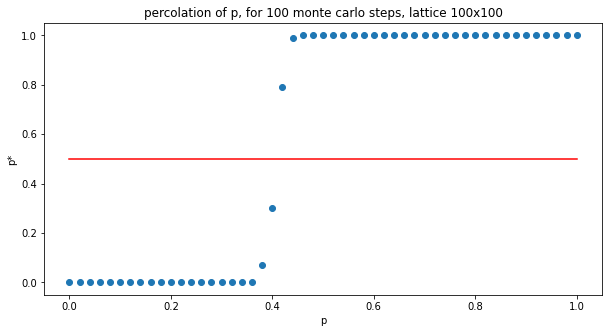

In [21]:
"""percolation p*(p), Lattice 100 X 100 """
size = 100
mc_steps=100
p_step = 0.02
plot_percolation(size=size, mc_steps=mc_steps, show = False)
plt.plot([0,1], [0.5, 0.5], 'r-')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [7:21:34<00:00, 2943.81s/it]


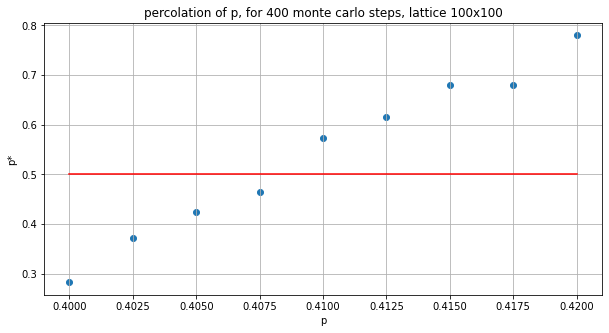

{0.4: 0.2825, 0.4025: 0.3725, 0.405: 0.425, 0.40750000000000003: 0.465, 0.41000000000000003: 0.5725, 0.41250000000000003: 0.615, 0.41500000000000004: 0.68, 0.41750000000000004: 0.68, 0.42000000000000004: 0.78}


In [9]:
# we take closer look.
size = 100
mc_steps = 400
p_step = 0.0025
p_min, p_max = 0.40, 0.42
perc = plot_percolation(size=size, mc_steps=mc_steps, p_step=p_step, p_min=p_min, p_max=p_max, show = False)
plt.plot([p_min, p_max], [0.5, 0.5], 'r-')
plt.show()
print(perc)


In [2]:
vals = {0.4: 0.2825, 0.4025: 0.3725, 0.405: 0.425, 0.40750000000000003: 0.465, 0.41000000000000003: 0.5725, 0.41250000000000003: 0.615, 0.41500000000000004: 0.68, 0.41750000000000004: 0.68, 0.42000000000000004: 0.78}
X = np.array([it for it in vals.keys()]).reshape(-1,1)
Y = np.array([it for it in vals.values()])

model = LinearRegression()
model.fit(X,Y)
print('estimator: ' + str((0.5 - model.intercept_)/model.coef_[0]))


estimator: 0.40826218801026354


# TASK 1, ESTIMATION "TREE BY TREE" (JUST TO SHOW IT'S IMPLEMENTED)

In [4]:
size = 20
mc_steps = 1000

res = []
for _ in tqdm(range(mc_steps)):
    tree = Forest(size, 0, gif_tool=None)
    res.append(tree.percolation_threshold_estimator())
    
print(np.mean(res))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:37<00:00,  2.19it/s]

0.41217499999999996


# TASK 2

In [5]:
""" Functions counting max cluster size with monte carlo included and creating plots"""

In [27]:
"""avg max cluster size(p), Lattice 100 X 100 """
# the code is performed in max_cluster_count_multithread.py due to performance optimization.
# The result:
print('100%|██████████| 21/21 [1:04:46<00:00, 185.08s/it]')
display(Image(url='data/figs/max_cluster_size.png'))

100%|██████████| 21/21 [1:04:46<00:00, 185.08s/it]


In [28]:
""" same for the p* threhold neighbourhood. """
print('100%|██████████| 12/12 [29:19<00:00, 146.62s/it]')
display(Image(url='data/figs/max_cluster_size_2.png'))

100%|██████████| 12/12 [29:19<00:00, 146.62s/it]
